# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wisnu Al Hussaeni
- **Email:** minasan763@gmail.com
- **ID Dicoding:** wisnu154

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling sering dibeli?
2. Metode pembayaran apa yang paling sering digunakan?
3. Kategori produk apa yang memiliki tingkat kepuasan pelanggan tertinggi berdasarkan ulasan?
4. Kota mana yang memiliki jumlah transaksi terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load dataset
cs = pd.read_csv('/content/customers_dataset.csv')
items = pd.read_csv('/content/order_items_dataset.csv')
pay = pd.read_csv('/content/order_payments_dataset.csv')
review = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
prod_cat = pd.read_csv('/content/product_category_name_translation.csv')
products = pd.read_csv('/content/products_dataset.csv')

In [3]:
datasets = [cs, items, pay, review, orders, prod_cat, products]
for i in datasets:
  print('\n', i.head())


                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

                            order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3      

**Insight:**
- Saya akan menggunakan tujuh dataset yang disesuaikan dengan kebutuhan untuk menjawab pertanyaan di atas.


### Assessing Data

In [4]:
for i in datasets:
  print('\n', i.isnull().sum())


 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer

In [5]:
for i in datasets:
  print('\n', i.duplicated().sum())


 0

 0

 0

 0

 0

 0

 0


In [6]:
# melihat dataset review
review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
review.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [8]:
# melihat dataset order
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [9]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [10]:
# melihat dataset product
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- terlihat untuk analisis lebih lanjut perlu dilakukan cleaning data terhadap dataset product, review, dan order karena masih ada beberapa kolom yang memeiliki nilai null
- kemudian data yang digunakan tidak ada yang duplikat

### Cleaning Data

In [12]:
# cleaning datset review
# mengisi review_comment_message dan review_comment_title yang kosong dengan string kosong
review.drop(columns='review_comment_title', inplace=True)
review['review_comment_message'].fillna('', inplace=True)

<ipython-input-12-0b944e25e4e1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  review['review_comment_message'].fillna('', inplace=True)


In [13]:
review

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,,2018-07-01 00:00:00,2018-07-02 12:59:13


In [14]:
review.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [15]:
# cleaning orders dataset
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'], inplace=True)

<ipython-input-15-8657bc8e0396>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
<ipython-input-15-8657bc8e0396>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [16]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [17]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [18]:
# cleaning dataset produts
# Mengisi missing values di kolom kategori produk dengan "Unknown"
products["product_category_name"].fillna("Unknown", inplace=True)

# Mengisi missing values di kolom numerik dengan median agar tetap representatif
numeric_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in numeric_cols:
    median_value = products[col].median()
    products[col].fillna(median_value, inplace=True)

<ipython-input-18-cd566e7a6250>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products["product_category_name"].fillna("Unknown", inplace=True)
<ipython-input-18-cd566e7a6250>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [19]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [20]:
products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [21]:
for i in datasets:
  print('\n', i.isnull().sum())


 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

 product_catego

**Insight:**
- saya sudah melakukan cleaning data untuk dataset review, orders, dan product. dimana masing-masing dataset penanganan untuk missing valuenya berbeda beda


## Exploratory Data Analysis (EDA)

In [22]:
# explorasi eda product
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


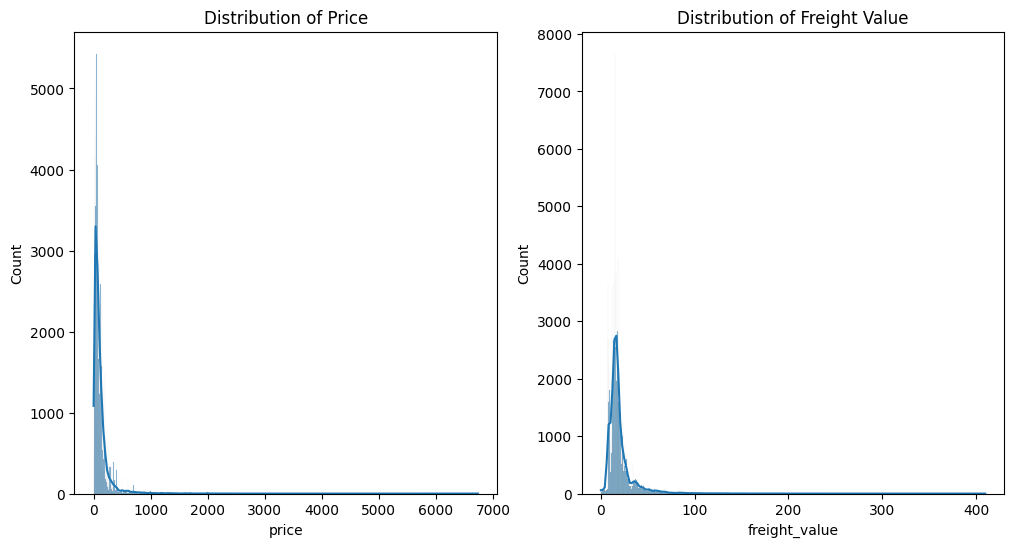

Skewness of Price: 7.92320826321351
Skewness of Freight Value: 5.639869620428684


In [24]:
# melihat sebaran harga dan biaya pengiriman.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(items['price'], kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(items['freight_value'], kde=True)
plt.title('Distribution of Freight Value')

plt.show()

# kalkulasi data condong kemana
price_skewness = items['price'].skew()
freight_skewness = items['freight_value'].skew()

print(f"Skewness of Price: {price_skewness}")
print(f"Skewness of Freight Value: {freight_skewness}")

- Harga (Price) = 7.92 menandakan positiv skewed ini artinya ada banyak produk yang murah dan beberpa ada yang mahal
- Biaya Pengiriman (Freight Value) = 5.64 juga positiv skewed, artinya sebagian besar biaya pengiriman rendah dan beberapa pesanan biaya pengiriman tinggi.

Outliers in 'price':
 7         810.00
16        639.00
26        289.00
30        397.00
39        809.10
           ...  
112586    299.99
112592    278.00
112632    736.00
112645    299.99
112646    350.00
Name: price, Length: 8427, dtype: float64

Outliers in 'freight_value':
 7         70.75
22        44.40
39        44.29
59        43.11
73        65.56
          ...  
112641    34.19
112642    34.19
112643    34.19
112645    43.41
112646    36.53
Name: freight_value, Length: 12134, dtype: float64


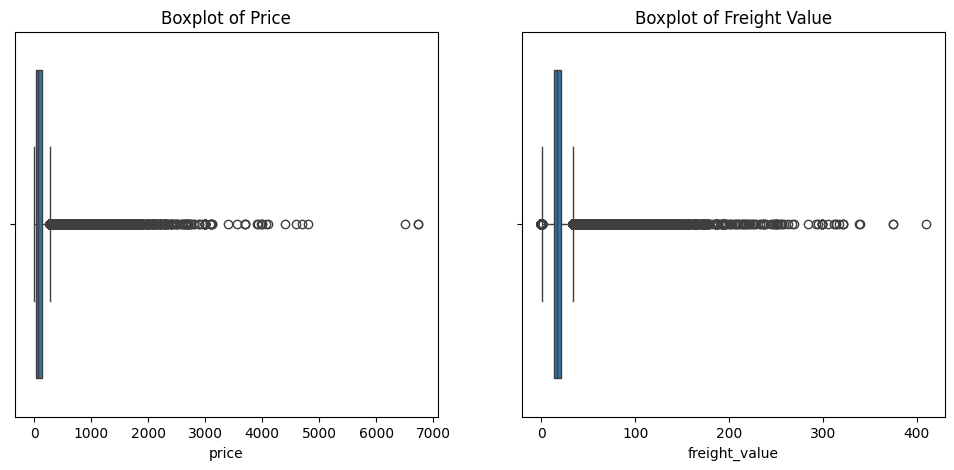

In [25]:
# fungsi untuk identifikasi outlier menggunakan IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# contoh penggunaan pada kolom 'price'
outliers_price = find_outliers_iqr(items['price'])
print("Outliers in 'price':\n", outliers_price)

# contoh penggunaan pada kolom 'freight_value'
outliers_freight = find_outliers_iqr(items['freight_value'])
print("\nOutliers in 'freight_value':\n", outliers_freight)

# visualisasi outlier
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=items['price'])
plt.title('Boxplot of Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=items['freight_value'])
plt.title('Boxplot of Freight Value')
plt.show()

dari dataset diatas ternyata untuk kolom harga (price) dan biaya pengirirman (freight value) memiliki banyak outlier

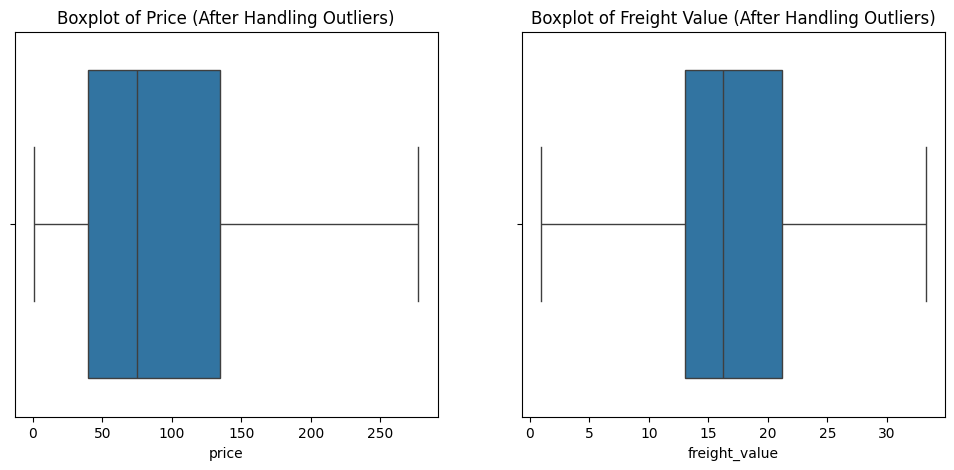

In [26]:
# fungsi untuk menangani outlier menggunakan IQR dengan capping
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # capping outliers
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

# contoh penggunaan pada kolom 'price'
items = handle_outliers_iqr(items, 'price')

# contoh penggunaan pada kolom 'freight_value'
items = handle_outliers_iqr(items, 'freight_value')

# visualisasi setelah penanganan outlier
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=items['price'])
plt.title('Boxplot of Price (After Handling Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=items['freight_value'])
plt.title('Boxplot of Freight Value (After Handling Outliers)')

plt.show()


setelah melakukan handling outlier dengan capping distribusi data sudah lebih baik

In [27]:
# explore eda payment
pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
pay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


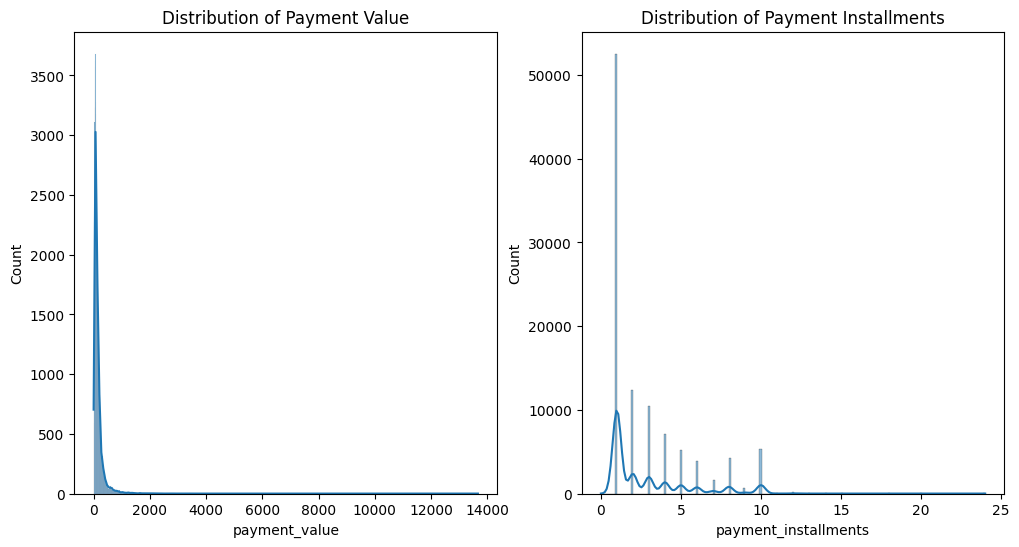

Skewness of Payment Value: 9.254009528478063
Skewness of Payment Installments: 1.6550737635551802


In [29]:
# cek distribusi payment_value dan payment_installments
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pay['payment_value'], kde=True)
plt.title('Distribution of Payment Value')

plt.subplot(1, 2, 2)
sns.histplot(pay['payment_installments'], kde=True)
plt.title('Distribution of Payment Installments')

plt.show()

payment_value_skewness = pay['payment_value'].skew()
payment_installments_skewness = pay['payment_installments'].skew()

print(f"Skewness of Payment Value: {payment_value_skewness}")
print(f"Skewness of Payment Installments: {payment_installments_skewness}")


- Distribusi payment value = 9.25 condong ke  ini artinya banyak transaksi dengan nilai kecil, tapi ada beberapa transaksi dengan nilai sangat besar.
- Sedangkan untuk payment installment = 1.65 tidak separah payment value, terlihat juga pola puncak pada angka tertentu (misalnya 1, 3, 6, 10). ini bisa dijadikan acuan pelanggan dalam menyicil

Outliers in 'payment_value':
 23        353.09
26        541.00
52        542.66
54        368.98
61        387.80
           ...  
103814    713.65
103843    372.08
103861    356.53
103881    363.31
103884    369.54
Name: payment_value, Length: 7981, dtype: float64

Outliers in 'payment_installments':
 15        10
23        10
87        10
95        10
112       10
          ..
103814    10
103834    10
103842    10
103864     9
103875    10
Name: payment_installments, Length: 6313, dtype: int64


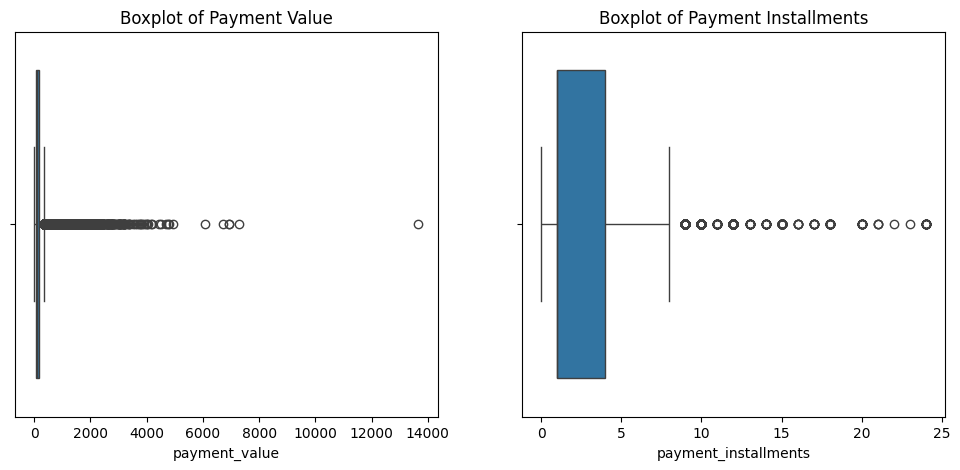

In [30]:
# identifikasi outlier
outliers_payment_value = find_outliers_iqr(pay['payment_value'])
print("Outliers in 'payment_value':\n", outliers_payment_value)

outliers_payment_installments = find_outliers_iqr(pay['payment_installments'])
print("\nOutliers in 'payment_installments':\n", outliers_payment_installments)

# visualisasi outlier
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=pay['payment_value'])
plt.title('Boxplot of Payment Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=pay['payment_installments'])
plt.title('Boxplot of Payment Installments')

plt.show()

terlihat untuk payment value memiliki banyak outlier dibandinngan payment installments

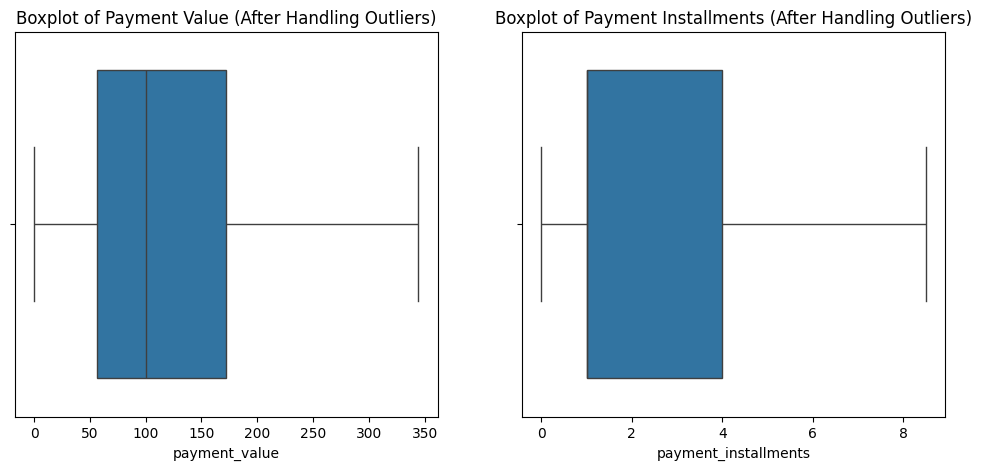

In [31]:
# handling outlier
pay = handle_outliers_iqr(pay, 'payment_value')
pay = handle_outliers_iqr(pay, 'payment_installments')

# visualisasi setelah handling outlier
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=pay['payment_value'])
plt.title('Boxplot of Payment Value (After Handling Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=pay['payment_installments'])
plt.title('Boxplot of Payment Installments (After Handling Outliers)')

plt.show()

In [32]:
# explore eda review
review.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [33]:
review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


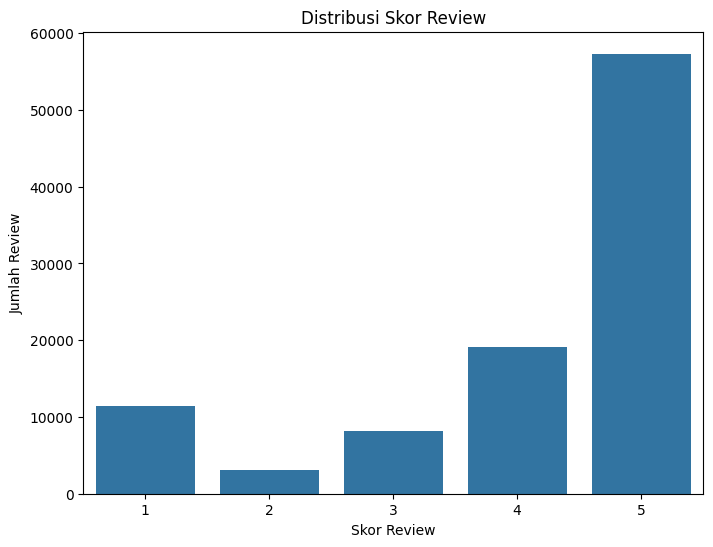

In [34]:
# visualisasi distribusi skor review
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=review)
plt.title('Distribusi Skor Review')
plt.xlabel('Skor Review')
plt.ylabel('Jumlah Review')
plt.show()

Skewness of Review Score: -1.3643857064388185

Outliers in 'review_score':
 5        1
16       2
19       1
29       1
32       1
        ..
99174    2
99184    1
99200    2
99203    2
99223    1
Name: review_score, Length: 14575, dtype: int64


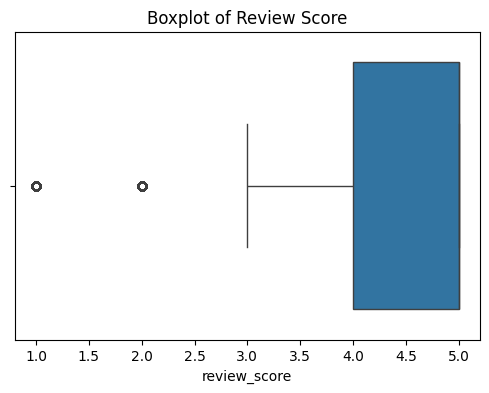

In [35]:
# kalkulasi skewe
review_score_skewness = review['review_score'].skew()
print(f"Skewness of Review Score: {review_score_skewness}")

# IQR
outliers_review_score = find_outliers_iqr(review['review_score'])
print("\nOutliers in 'review_score':\n", outliers_review_score)

# visualisasi
plt.figure(figsize=(6, 4))
sns.boxplot(x=review['review_score'])
plt.title('Boxplot of Review Score')
plt.show()

In [36]:
# explore eda product
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [37]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


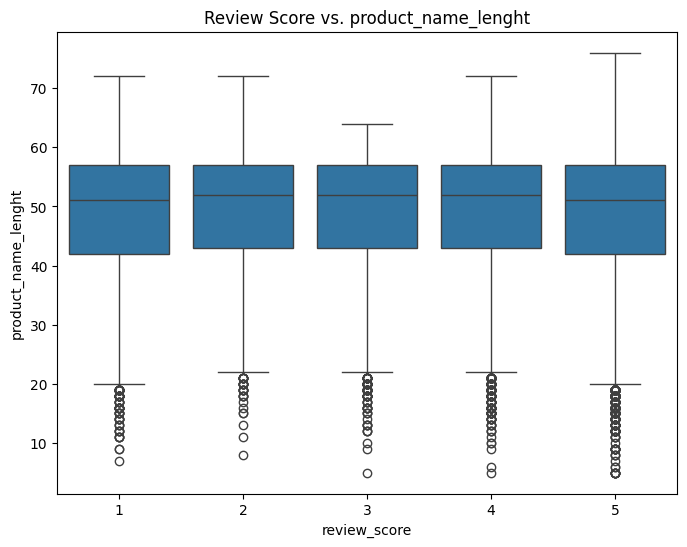

Correlation between review score and product_name_lenght: -0.00655485788269224


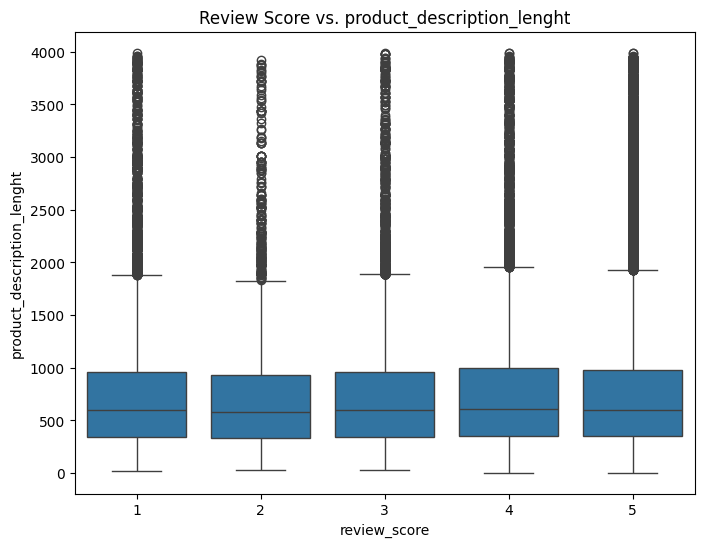

Correlation between review score and product_description_lenght: 0.013616875330218697


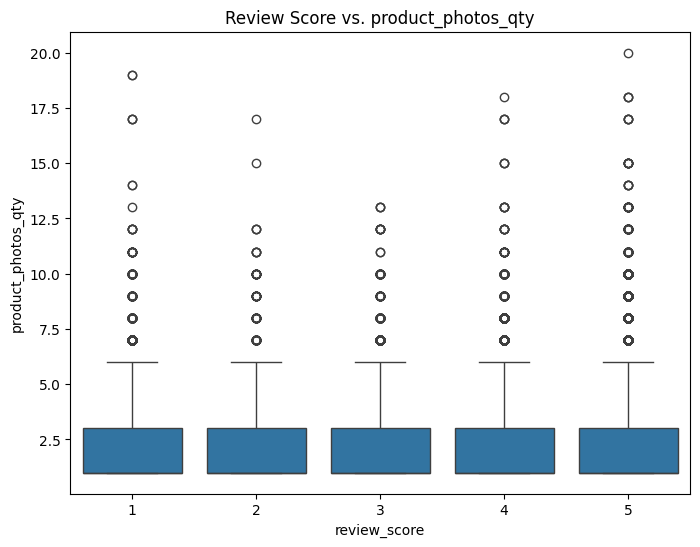

Correlation between review score and product_photos_qty: 0.023728481515863036


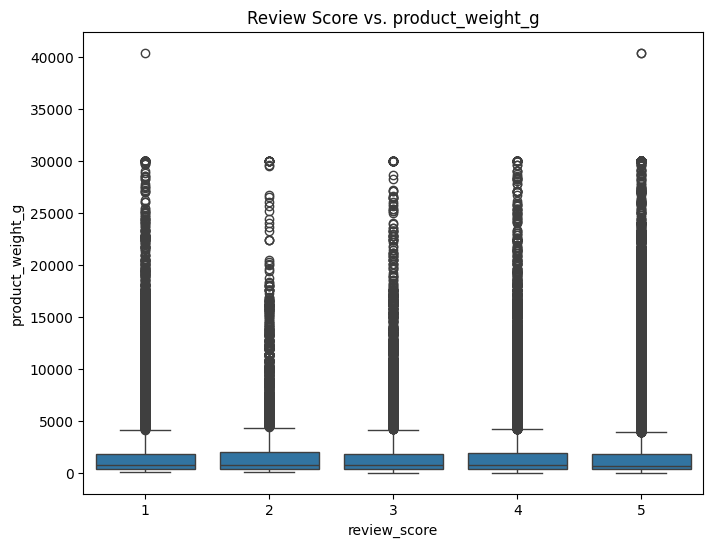

Correlation between review score and product_weight_g: -0.029808019382490454


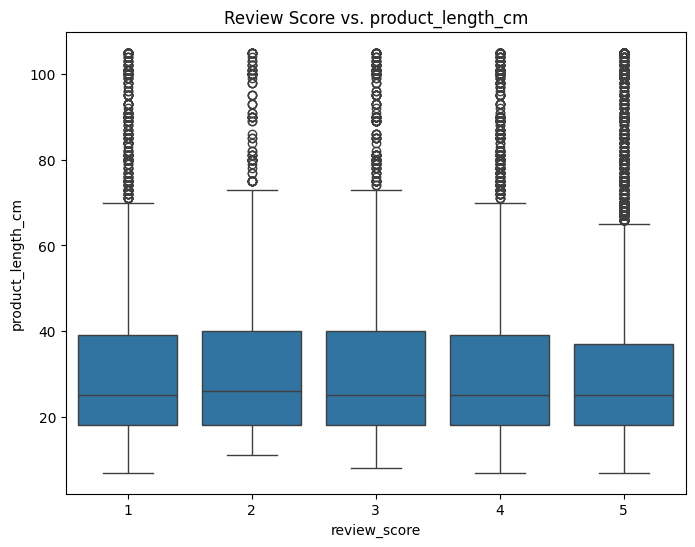

Correlation between review score and product_length_cm: -0.020402952061349896


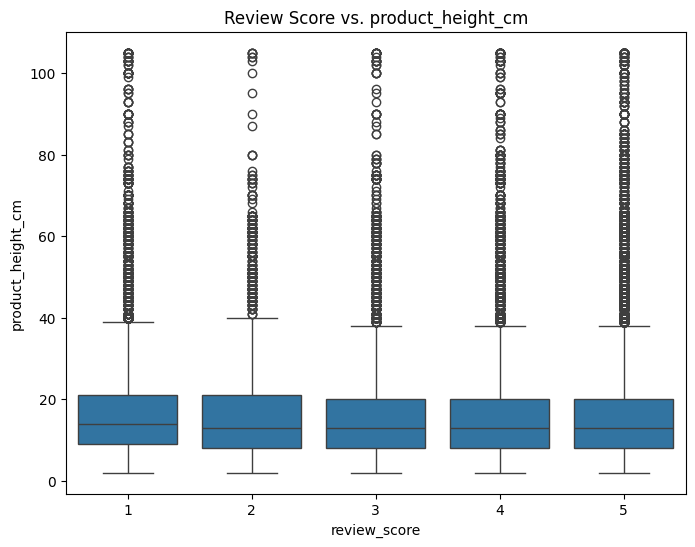

Correlation between review score and product_height_cm: -0.02797762239279583


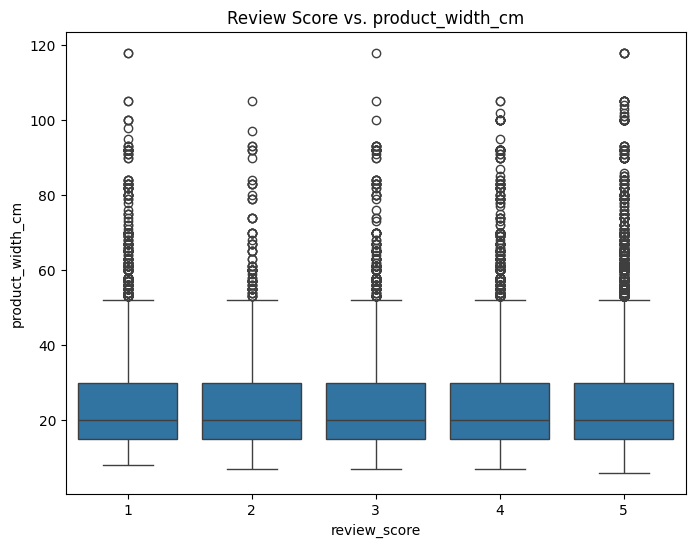

Correlation between review score and product_width_cm: -0.011844571248414672


In [38]:
# apakah product_name_lenght, product_description_lenght, product_photos, product_weight mempengaruhi hasil review
# gabungkan dataframe
merged_df = pd.merge(orders, review, on='order_id', how='inner')
merged_df = pd.merge(merged_df, items, on='order_id', how='inner')
merged_df = pd.merge(merged_df, products, on='product_id', how='inner')

product_attributes = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm',	'product_height_cm', 'product_width_cm']
for attr in product_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='review_score', y=attr, data=merged_df)
    plt.title(f'Review Score vs. {attr}')
    plt.show()

    # kalkulasi
    correlation = merged_df['review_score'].corr(merged_df[attr])
    print(f"Correlation between review score and {attr}: {correlation}")

- Dilihat dari hasil corelasi Product Name Length dan review (-0.0066) panjang nama tidak terlalu mempengaruhi terhadap rating pelanggan.

- Selanjutnya Product Description Length (0.0136) deskripsi produk lebih panjang sedikit berkorelasi positif, tapi sangat kecil. mungkin deskripsi yang lebih jelas sedikit membantu review score, tapi efeknya tidak besar.

- Product Photos Quantity (0.0237) semakin banyak foto produk, review score cenderung sedikit lebih tinggi. Bisa jadi karena lebih banyak foto membantu pelanggan memahami produk lebih baik.

- Product Weight (-0.0298) → produk yang lebih berat sedikit cenderung mendapat review lebih rendah. Mungkin karena berat berpengaruh pada ongkir.

- Product Dimensions (Length, Height, Width) (-0.02 sampai -0.027) produk yang lebih besar sedikit cenderung mendapat review lebih rendah. Bisa jadi karena packing lebih sulit, pengiriman lebih mahal, atau sulit disimpan oleh pembeli.

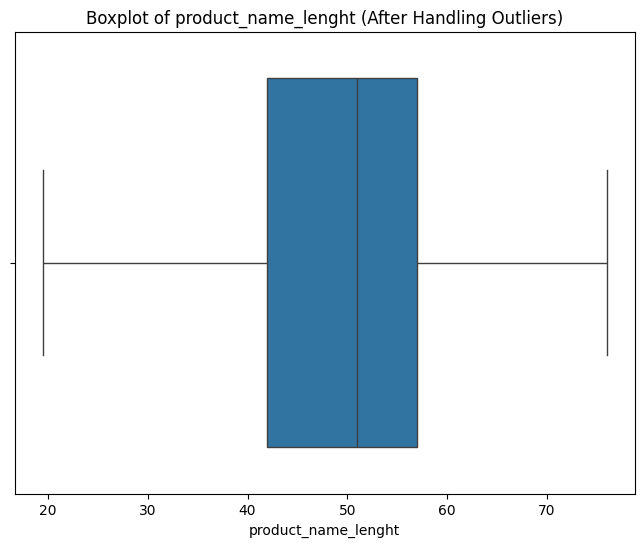

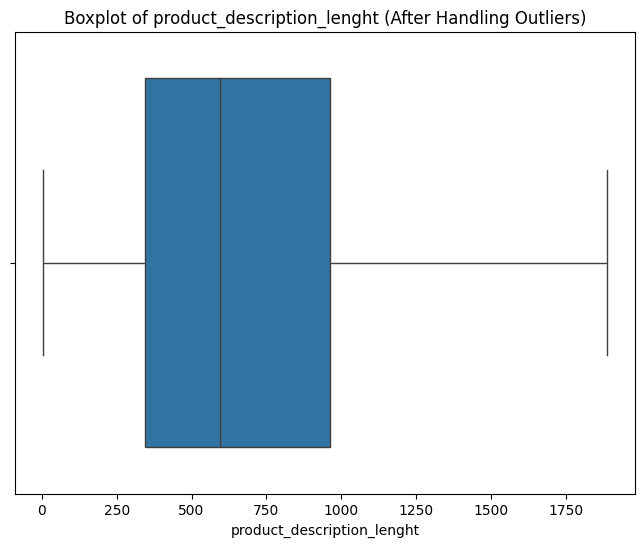

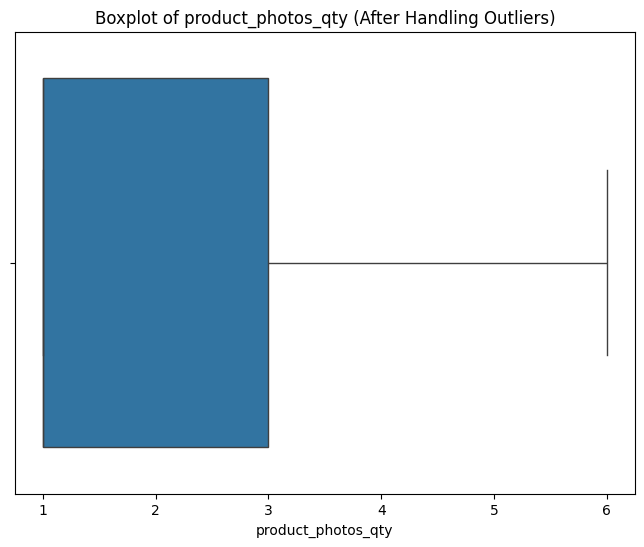

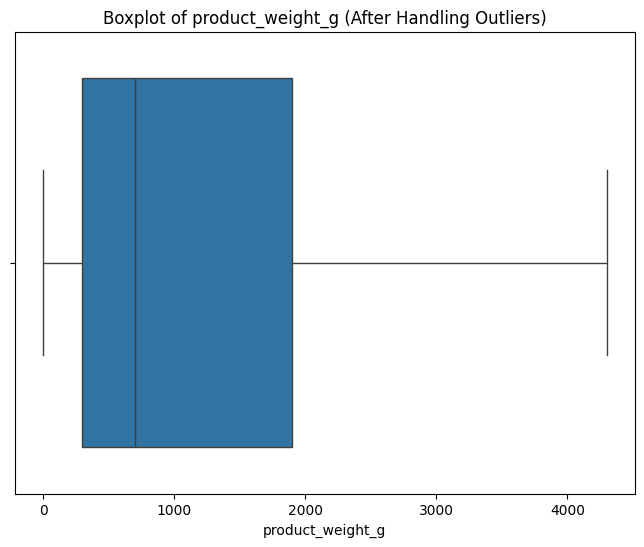

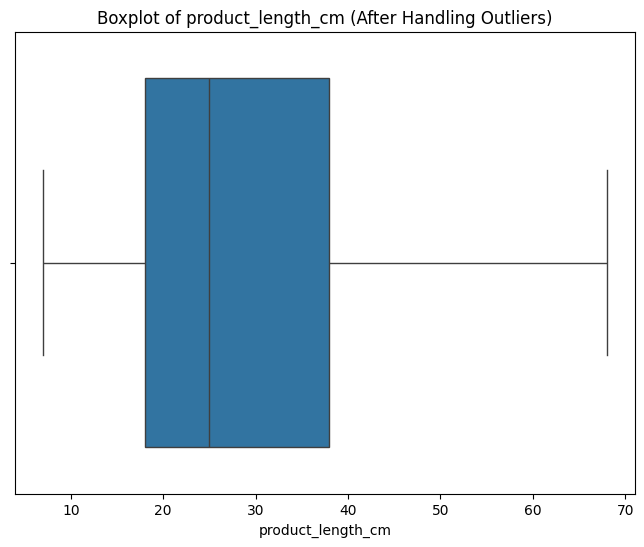

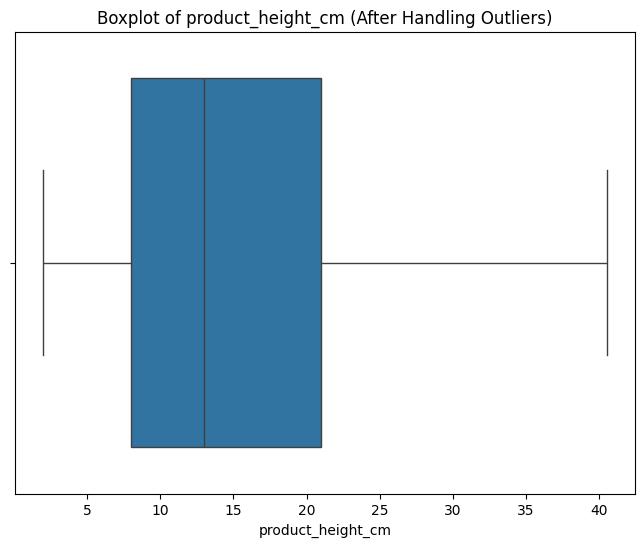

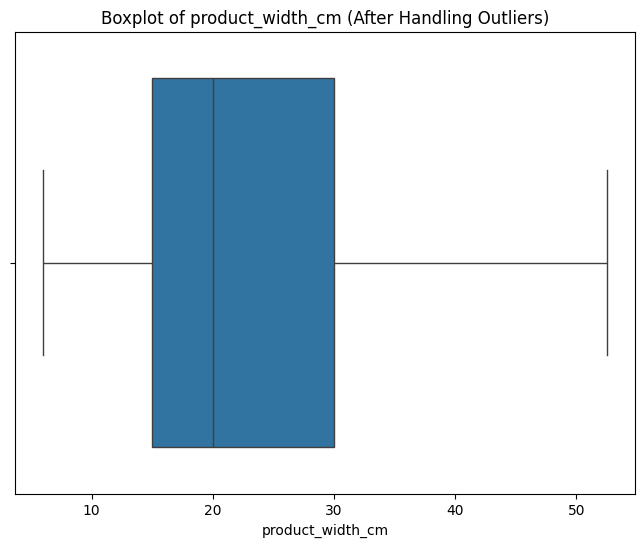

In [39]:
# Kolom-kolom yang akan diproses
product_attributes = ['product_name_lenght', 'product_description_lenght',
                      'product_photos_qty', 'product_weight_g',
                      'product_length_cm', 'product_height_cm', 'product_width_cm']

for attr in product_attributes:
    # Handling outlier
    products = handle_outliers_iqr(products, attr)

    # Visualisasi setelah penanganan outlier
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=products[attr])
    plt.title(f'Boxplot of {attr} (After Handling Outliers)')
    plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-40-7abd61585881>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products['counts'], y=top_10_products['product_category_name'],  palette="viridis")


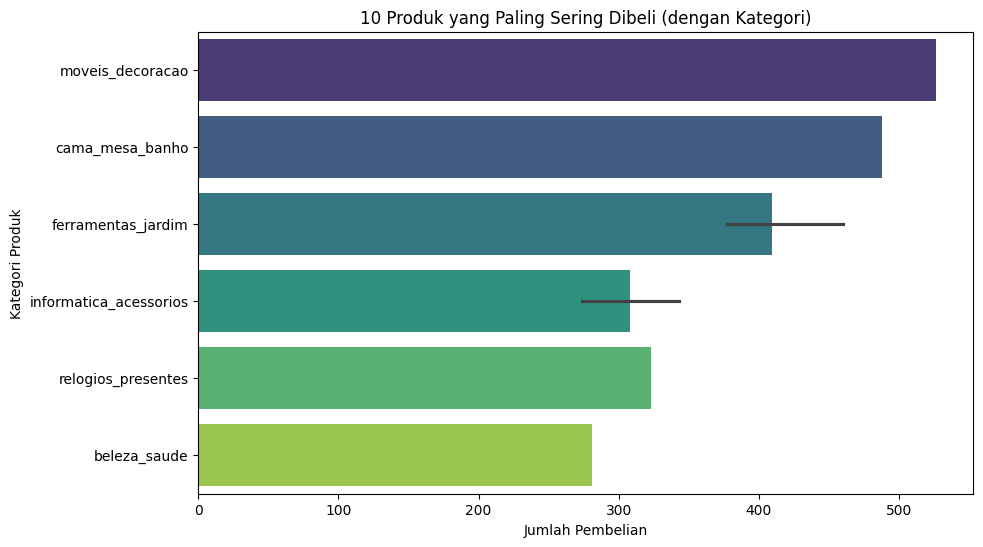

In [ ]:
# menggabungkan data penjualan dengan data produk untuk mendapatkan nama kategori
merged_data = pd.merge(items, products, on='product_id', how='left')

# Hitung jumlah penjualan per produk
product_counts = merged_data['product_id'].value_counts()

# gabungkan dengan informasi kategori produk
top_products = merged_data.groupby('product_id')['product_category_name'].first()
top_products = pd.DataFrame(top_products)
top_products['counts'] = product_counts
top_products = top_products.sort_values('counts', ascending=False)

# mengambil 10 produk teratas dan menyimpannya dalam variabel top_10_products
top_10_products = top_products.head(10)

plt.figure(figsize=(10, 6))
# Menggunakan top_10_products dalam sns.barplot
sns.barplot(x=top_10_products['counts'], y=top_10_products['product_category_name'],  palette="viridis")
plt.xlabel("Jumlah Pembelian")
plt.ylabel("Kategori Produk")
plt.title("Produk yang Paling Sering Dibeli (dengan Kategori)")
plt.show()

**insight**: Kategori Produk Paling Populer
- Kategori "moveis_decoracao" merupakan produk yang paling sering dibeli, dengan jumlah pembelian tertinggi. Ini menunjukkan bahwa pelanggan memiliki minat besar dalam produk dekorasi rumah.

- Selanjutnya ada "cama_mesa_banho" juga memiliki jumlah pembelian yang tinggi, menunjukkan bahwa kebutuhan rumah tangga cukup dominan dalam transaksi.

- Selanjutnya ada kategori menengah "ferramentas_jardim"  memiliki jumlah pembelian yang cukup tinggi, tetapi dengan variasi yang lebih besar.

- selanjutnya ada "informatica_acessorios"juga cukup populer tetapi dengan sedikit variasi dalam jumlah pembelian.

- selanjutnya ada kategori pembelian rendah "relogios_presentes" dan "beleza_saude" memiliki jumlah pembelian yang lebih rendah dibandingkan kategori lainnya dalam grafik.

### Pertanyaan 2:

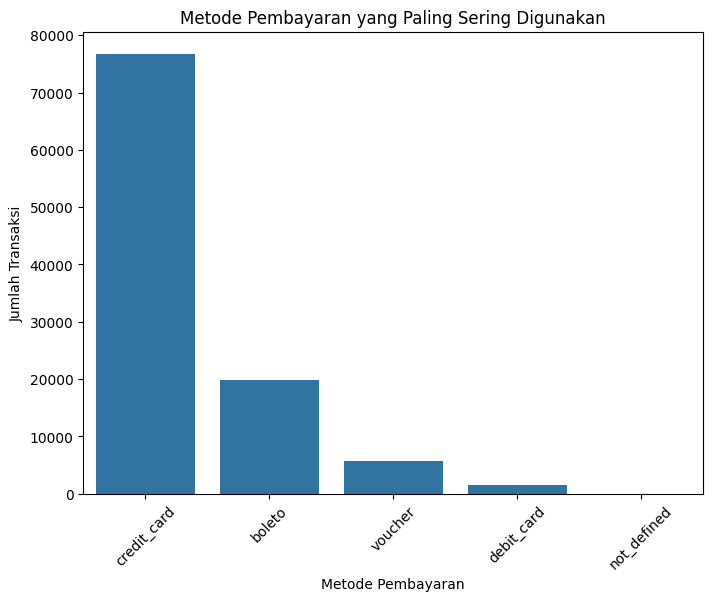

In [41]:
# Metode pembayaran yang paling sering digunakan
payment_counts = pay['payment_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=pay, order=pay['payment_type'].value_counts().index)
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.title("Metode Pembayaran yang Paling Sering Digunakan")
plt.xticks(rotation=45)
plt.show()

**Insight**: Metode Pembayaran yang Paling Sering Digunakan
- Kartu Kredit (credit_card) adalah metode pembayaran yang paling banyak digunakan. Jumlah transaksi dengan kartu kredit jauh lebih tinggi dibanding metode lain, menunjukkan bahwa pelanggan lebih memilih kenyamanan dan fleksibilitas pembayaran dengan kartu kredit.

- Boleto sebagai metode pembayaran kedua yang paling populer. Metode pembayaran berbasis voucher yang umum digunakan di Brasil. Banyak pengguna yang lebih memilih metode ini karena mungkin lebih mudah diakses tanpa perlu rekening bank.

- Penggunaan voucher cukup signifikan, namun masih jauh di bawah kartu kredit dan boleto. Ini menunjukkan bahwa program promo dan diskon dalam bentuk voucher tetap menarik bagi sebagian pelanggan.

- Debit card kurang populer dibandingkan kartu kredit. Bisa jadi karena pelanggan lebih suka menggunakan kartu kredit untuk manfaat tambahan seperti reward points atau cicilan.

-  Terahir ada kategori "not_defined", yang jumlah transaksinya sangat kecil. Mungkin ini adalah transaksi yang tidak memiliki metode pembayaran yang tak tercatat atau error dalam sistem pencatatan.

### Pertanyaan 3:

<ipython-input-42-f41d3c746c99>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_satisfaction.head(10).values, y=category_satisfaction.head(10).index, palette="viridis")


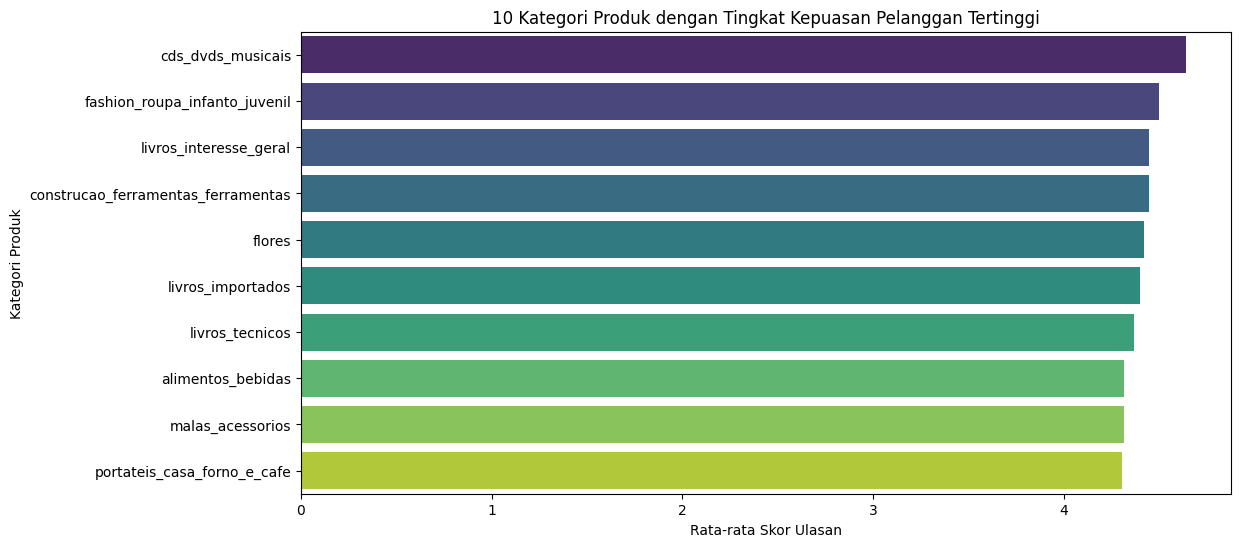

In [42]:
# kategori produk apa yang memiliki tingkat kepuasan pelanggan tertinggi berdasarkan ulasan?
# gabungkan data yang diperlukan
merged_data = pd.merge(orders, review, on='order_id', how='inner')
merged_data = pd.merge(merged_data, items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products, on='product_id', how='left')

# kelompokkan berdasarkan kategori produk dan hitung rata-rata skor ulasan
category_satisfaction = merged_data.groupby('product_category_name')['review_score'].mean()

# urutkan berdasarkan tingkat kepuasan pelanggan
category_satisfaction = category_satisfaction.sort_values(ascending=False)

# visualisasikan hasil
plt.figure(figsize=(12, 6))
sns.barplot(x=category_satisfaction.head(10).values, y=category_satisfaction.head(10).index, palette="viridis")
plt.xlabel("Rata-rata Skor Ulasan")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk dengan Tingkat Kepuasan Pelanggan Tertinggi")
plt.show()

**Insught**: Kategori Produk dengan Tingkat Kepuasan Pelanggan Tertinggi

- Kategori "cds_dvds_musicais" memiliki tingkat kepuasan pelanggan tertinggi.
Produk dalam kategori ini kemungkinan besar memiliki kualitas baik, sesuai ekspektasi pelanggan, atau memiliki sedikit kendala dalam pengiriman.
Bisa juga karena kategori ini memiliki pembeli yang lebih spesifik dan sudah mengetahui apa yang mereka beli.
- Kategori kedua Fashion anak dan remaja (fashion_roupa_infanto_juvenil)
Ini menunjukkan bahwa pakaian untuk anak dan remaja memiliki kualitas yang baik dan sesuai dengan harapan pelanggan. Kemungkinan juga didukung oleh variasi produk yang luas dan kebijakan pengembalian yang baik.

- Ketiga kategori buku yaitu "livros_interesse_geral" (buku umum), "livros_importados" (buku impor), dan "livros_tecnicos" (buku teknis) masuk dalam daftar 10 besar. Ini menandakan bahwa pelanggan yang membeli buku umumnya puas karena produk sesuai dengan deskripsi dan memiliki nilai yang baik bagi pembacanya.
- Kategori "flores" masuk dalam daftar produk dengan kepuasan tinggi. Ini bisa berarti bahwa layanan pengiriman bunga cukup baik dan pelanggan mendapatkan produk yang segar dan sesuai dengan harapan.

<ipython-input-45-257b408ccb53>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_transactions.head(10).values, y=city_transactions.head(10).index, palette="viridis")


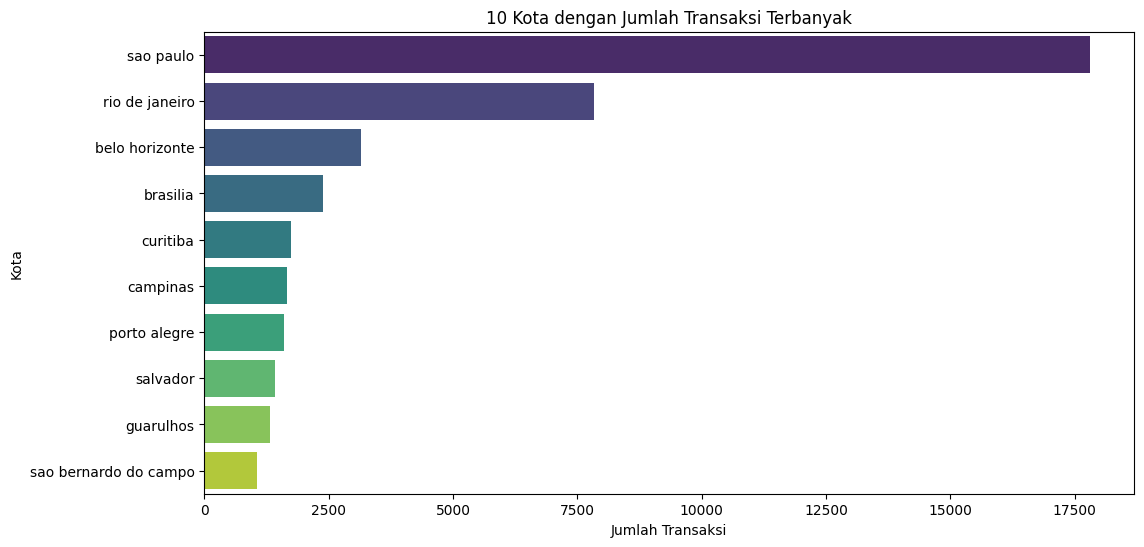

In [45]:
# kota mana yang memiliki jumlah transaksi terbanyak?
# gabungkan data yang diperlukan
merged_data = pd.merge(orders, items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, cs, on='customer_id', how='left')

# Hitung jumlah transaksi per kota
city_transactions = merged_data['customer_city'].value_counts()

# Visualisasikan 10 kota teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=city_transactions.head(10).values, y=city_transactions.head(10).index, palette="viridis")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kota")
plt.title("10 Kota dengan Jumlah Transaksi Terbanyak")
plt.show()

**Insight:** Kota dengan Jumlah Transaksi Terbanyak

- Sao Paulo mendominasi jumlah transaksi jauh lebih tinggi dibandingkan kota lainnya, menunjukkan bahwa kota ini adalah pusat utama aktivitas e-commerce di Brasil. Ini bisa disebabkan oleh populasi yang besar, daya beli yang tinggi, dan infrastruktur yang mendukung transaksi online.
- Rio de Janeiro berada di posisi kedua dengan selisih cukup besar. Meskipun Rio de Janeiro juga memiliki banyak transaksi, jumlahnya masih jauh lebih sedikit dibandingkan Sao Paulo.
- Distribusi transaksi menurun signifikan setelah posisi ketiga. Kota-kota seperti Belo Horizonte, Brasília, dan Curitiba memiliki jumlah transaksi yang cukup tinggi, tetapi masih tertinggal jauh dari Sao Paulo dan Rio de Janeiro. Ini bisa menunjukkan bahwa adopsi e-commerce di kota-kota ini sedang tumbuh, tetapi belum sebesar dua kota teratas.


## Conclusion

- Conclution pertanyaan 1:
Produk rumah tangga sangat diminati, menjadikannya peluang besar bagi penjual. Produk kecantikan, kesehatan, dan hadiah berpotensi tinggi tetapi memerlukan strategi pemasaran agresif. Sementara itu, aksesoris komputer stabil, kemungkinan dipengaruhi oleh tren teknologi dan kebutuhan pelanggan.
- Conclution pertanyaan 2: Menyediakan opsi kartu kredit dan boleto sangat penting dalam bisnis online, dengan promo diskon, cashback, dan voucher sebagai strategi efektif untuk meningkatkan transaksi dan menarik lebih banyak pelanggan.
- Conclution pertanyaan 3: Produk dengan ulasan tinggi berpotensi meningkatkan penjualan melalui pemasaran berbasis ulasan positif. Pelanggan lebih puas dengan deskripsi produk yang jelas dan sesuai ekspektasi. Kategori seperti buku, pakaian anak, dan alat rumah tangga layak dipromosikan, dengan fokus pada layanan pelanggan dan kualitas untuk meningkatkan loyalitas serta reputasi brand.
- Conclution pertanyaan 4: Sao Paulo adalah pasar e-commerce terbesar di Brasil, diikuti oleh Rio de Janeiro dengan potensi pertumbuhan lebih lanjut. Kota menengah seperti Belo Horizonte dan Brasília bisa menjadi target ekspansi dengan strategi promosi yang tepat. Efisiensi pengiriman dan fulfillment sangat penting untuk meningkatkan transaksi di kota-kota lebih kecil.